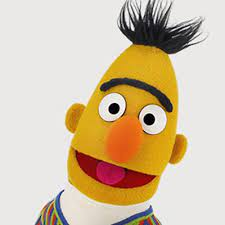

Bert (from sesame street)


---

# Prepping Packages:

---

In [ ]:
!pip install transformers
!pip install -U tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 7.4 MB/s 
     |████████████████████████████████| 596 kB 32.0 MB/s 
     |████████████████████████████████| 6.6 MB 10.2 MB/s 
     |████████████████████████████████| 101 kB 6.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.6 MB 7.9 MB/s 
     |████████████████████████████████| 511.7 MB 6.3 kB/s 
     |████████████████████████████████| 5.8 MB 35.3 MB/s 
     |████████████████████████████████| 1.6 MB 37.1 MB/s 
     |████████████████████████████████| 438 kB 72.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-

In [ ]:
import tensorflow as tf
import numpy as np
import nltk
nltk.download("stopwords")
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import os
import json
import string
import zipfile
import shutil

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


---

# Data Setup:

---


In [ ]:
!wget "https://docs.google.com/uc?export=download&id=1H-IMIUDSM7Y-jPjo8skbcxNBBGovbiLL" -O "balanced_labelled_news_data_w_text.csv"

--2022-08-11 01:07:10--  https://docs.google.com/uc?export=download&id=1H-IMIUDSM7Y-jPjo8skbcxNBBGovbiLL
Resolving docs.google.com (docs.google.com)... 74.125.197.139, 74.125.197.100, 74.125.197.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.197.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-08-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/62va3ftcjldmagjfmdgl4ojqmphcn11b/1660180050000/07524398318767206543/*/1H-IMIUDSM7Y-jPjo8skbcxNBBGovbiLL?e=download&uuid=c05f46b5-3261-480e-8be9-38e6dd737032 [following]
--2022-08-11 01:07:39--  https://doc-14-08-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/62va3ftcjldmagjfmdgl4ojqmphcn11b/1660180050000/07524398318767206543/*/1H-IMIUDSM7Y-jPjo8skbcxNBBGovbiLL?e=download&uuid=c05f46b5-3261-480e-8be9-38e6dd737032
Resolving doc-14-08-docs.googleusercontent.com (doc-14-08-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:

In [ ]:
data = pd.read_csv("balanced_labelled_news_data_w_text.csv")
display(data[:5])
print(list(nltk.corpus.stopwords.words("english")))

data = data[["label", "text"]].copy()
data["text"] = data["text"].astype(str)
# data["text"] = data["text"].map(lambda text: " ".join([word for word in text.replace("\n", " ").split(" ") if word not in nltk.corpus.stopwords.words("english")]))
data["label"] = data["label"].astype(int).map(lambda x: x-1)
display(data[:5])
data.iloc[0]["text"]

,Unnamed: 0,url,q3,perceived,primary.topic,secondary.topic,democrat.vote,republican.vote,label,text
0,0,http://www.latimes.com/news/nationworld/nation...,News,0,Environment,International News,SomewhatPositive,Neutral,1,Obama considers sweeping climate plan\nWASHING...
1,1,http://www.dailykos.com/story/2013/06/30/12189...,Opinion,0,Elections,None,Positive,Negative,1,Like every other state where Republicans have ...
2,2,http://www.dailykos.com/story/2013/10/18/12486...,Opinion,0,Healthcare,None,SomewhatPositive,Negative,1,Fox News Nation strikes again.\nSean Hannity h...
3,3,http://www.dailykos.com/story/2013/11/24/12568...,News,1,Economy,None,SomewhatPositive,SomewhatNegative,1,Rep. Paul Ryan's commitment to ending poverty ...
4,4,http://www.breitbart.com/Big-Government/2013/0...,News,0,National Security,None,SomewhatPositive,SomewhatNegative,1,An employee of Grover Norquist’s Americans for...


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

,label,text
0,0,Obama considers sweeping climate plan\nWASHING...
1,0,Like every other state where Republicans have ...
2,0,Fox News Nation strikes again.\nSean Hannity h...
3,0,Rep. Paul Ryan's commitment to ending poverty ...
4,0,An employee of Grover Norquist’s Americans for...


"Obama considers sweeping climate plan\nWASHINGTON — The Obama administration is considering a sweeping initiative to address climate change, including the first-ever limits on carbon dioxide from power plants, the country’s biggest source of greenhouse gas emissions, according to people familiar with the discussions.\nThe White House has yet to settle on specific measures, but “we’re hearing that existing power plants are definitely in the mix,” said a person with knowledge of the deliberations, who, like others, asked not to be identified to talk about White House discussions. An announcement could come by mid-July.\nPower plants account for about a third of the country’s greenhouse gas emissions, with most of the carbon dioxide coming from coal-fired plants and, to a lesser extent, natural gas generation. Issuing rules to curtail their pollution would almost certainly touch off a battle in the courts and Congress.\n“There are only a few substantive, meaningful actions the administra

In [ ]:
full_dataset = tf.data.Dataset.from_tensor_slices((data["text"], data["label"].astype(int)))
full_dataset = full_dataset.map(lambda x, y: (("[CLS] " + x), y))
full_dataset = full_dataset.shuffle(len(full_dataset))
full_dataset = full_dataset.repeat(15)  # i guess equivalent to training 15 epochs (training epochs are smaller than full dataset cause the dataset is pretty big and for more validation)

val_dataset_size = 500
batch_size = 8  # this is the max before colab GPU OOM

train_dataset = full_dataset.skip(val_dataset_size)
validation_dataset = full_dataset.take(val_dataset_size)
train_dataset = train_dataset.batch(batch_size)
validation_dataset = validation_dataset.batch(batch_size)

print(list(next(iter(train_dataset.as_numpy_iterator()))))

[array([b'[CLS] Perhaps we can help you find what you wanted when you hit this error page?\nTry our site map for a list of all online sections or check out our columnists page.\nWe also have search tools for finding a particular stories and topics pages covering many major issues and people.\nIf you are looking for a particular suburban publication or story, the best place to start is our suburbs page.\nFinally, you may want to take a look at our archives, which date back to 1849.\nIf none of these suggestions work, please feel free to read through our FAQ or send us a question or comment.',
       b'[CLS] Shutdown ruins vacations, hurts local economies\nFLAGSTAFF, Ariz. (AP) \xe2\x80\x94 Stop at a cafe in the remote stretches of northern Arizona and southern Utah in the fall, and you\'re likely to hear a mix of languages as tourists from around the world step into the iconic western landscape, marked by breathtaking canyons and massive rock formations.\nMillions of visitors tour the r

---

# Model Initialization:

---

In [ ]:
from transformers import TFBertTokenizer, TFBertForSequenceClassification, TFDistilBertForSequenceClassification
hf_bert_model_path = "distilbert-base-uncased"  # https://huggingface.co/bert-base-uncased  Note that there are other BERT models available.


tokenizer = TFBertTokenizer.from_pretrained(hf_bert_model_path)  # no TFDistilBertTokenizer, so just use regular bert
classifier = TFDistilBertForSequenceClassification.from_pretrained(hf_bert_model_path, num_labels=3)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_transform', 'vocab_projector', 'activation_13', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['dropout_19', 'classifier', 'pre_classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

In [ ]:
class MultiOutLayer(tf.keras.layers.Layer):
  def __init__(self, output, activation="linear", *args, **kwargs):
    super().__init__(*args, **kwargs)
    output = [output] if isinstance(output, int) else output
    self.output_sizes = output
    self.output_layers = [tf.keras.layers.Dense(size, activation=activation) for size in output]

  def call(self, inputs):
    out = [tf.reshape(layer(inputs), (-1, 1, self.output_sizes[i])) for i, layer in enumerate(self.output_layers)]
    if len(out) > 1:
      return tf.concat(out, axis=1)
    else:
      return out[0]


class BertTokenizerClassifierCombined(tf.keras.Model):
  def __init__(self, tokenizer, classifier, output_layer_override=None, *args, **kwargs):
    super().__init__(*args, **kwargs)
    self.tokenizer = tokenizer
    self.classifier = classifier
    if output_layer_override is not None:
      self.classifier.classifier = output_layer_override  # replace output with custom
  
  
  def call(self, data):
    tokenized = self.tokenizer(data)
    del tokenized["token_type_ids"]  # for DistilBERT
    print(tokenized)
    out = self.classifier(**tokenized)
    print(out)
    return out



model = BertTokenizerClassifierCombined(tokenizer=tokenizer, classifier=classifier, output_layer_override=None)

In [ ]:
# Sanity check
model(["Hello World!", "E", "ZZZ", "wasdwasdwsd"])

{'input_ids': <tf.Tensor: shape=(4, 8), dtype=int64, numpy=
array([[  101,  7592,  2088,   999,   102,     0,     0,     0],
       [  101,  1041,   102,     0,     0,     0,     0,     0],
       [  101,  1062, 13213,   102,     0,     0,     0,     0],
       [  101,  2001,  2094, 17311,  2094,  9333,  2094,   102]])>, 'attention_mask': <tf.Tensor: shape=(4, 8), dtype=int64, numpy=
array([[1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1]])>}
TFSequenceClassifierOutput(loss=None, logits=<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[ 0.02133938, -0.02170567, -0.02940661],
       [ 0.0359246 , -0.00137939, -0.00984681],
       [ 0.0405022 , -0.0037818 , -0.0215605 ],
       [ 0.03525259, -0.00523192,  0.02804204]], dtype=float32)>, hidden_states=None, attentions=None)


TFSequenceClassifierOutput([('logits',
                             <tf.Tensor: shape=(4, 3), dtype=float32, numpy=
                             array([[ 0.02133938, -0.02170567, -0.02940661],
                                    [ 0.0359246 , -0.00137939, -0.00984681],
                                    [ 0.0405022 , -0.0037818 , -0.0215605 ],
                                    [ 0.03525259, -0.00523192,  0.02804204]], dtype=float32)>)])

---

# Model Training:

---


In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

history = model.fit(train_dataset, validation_data=validation_dataset, epochs=50, batch_size=3, steps_per_epoch=100)

Epoch 1/50
{'input_ids': <tf.Tensor 'bert_tokenizer_classifier_combined/tf_bert_tokenizer/pad_model_inputs/RaggedToTensor/RaggedTensorToTensor:0' shape=(None, None) dtype=int64>, 'attention_mask': <tf.Tensor 'bert_tokenizer_classifier_combined/tf_bert_tokenizer/pad_model_inputs/RaggedToTensor_1/RaggedTensorToTensor:0' shape=(None, None) dtype=int64>}
TFSequenceClassifierOutput(loss=None, logits=<tf.Tensor 'bert_tokenizer_classifier_combined/tf_distil_bert_for_sequence_classification/classifier/BiasAdd:0' shape=(None, 3) dtype=float32>, hidden_states=None, attentions=None)
{'input_ids': <tf.Tensor 'bert_tokenizer_classifier_combined/tf_bert_tokenizer/pad_model_inputs/RaggedToTensor/RaggedTensorToTensor:0' shape=(None, None) dtype=int64>, 'attention_mask': <tf.Tensor 'bert_tokenizer_classifier_combined/tf_bert_tokenizer/pad_model_inputs/RaggedToTensor_1/RaggedTensorToTensor:0' shape=(None, None) dtype=int64>}
TFSequenceClassifierOutput(loss=None, logits=<tf.Tensor 'bert_tokenizer_classif

100/100 [==============================] - 57s 567ms/step - loss: 0.3365 - accuracy: 0.8217 - val_loss: 0.2901 - val_accuracy: 0.8420


---

# Model Saving:

---


In [ ]:
base_dir = "distilbert_v2"

os.mkdir(base_dir)

with open(os.path.join(base_dir, "history.json"), "w") as fp:
  history = json.dump(model.history.history, fp)
  
os.mkdir(os.path.join(base_dir, "weights"))
model.save_weights(os.path.join(base_dir, "weights", base_dir), save_format="tf")

In [ ]:
shutil.make_archive(base_dir, 'zip', base_dir)

'/content/distilbert_v2.zip'

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
# !cp "distilbert_v2.zip" '/content/gdrive/My Drive/FutureMakers2022/Models'

---

#Model Loading:

---
(if starting here, remember to run the pip, import, data, and model def cells first!)

In [ ]:
!wget "https://docs.google.com/uc?export=download&id=1-0PA2XTdJhZxDvqSf5xj1TaxcQpM-U2z&confirm=t&uuid=68b827df-d38d-4f34-a034-385b88b67a08" -O "distilbert_v2.zip"

--2022-08-11 04:46:52--  https://docs.google.com/uc?export=download&id=1-0PA2XTdJhZxDvqSf5xj1TaxcQpM-U2z&confirm=t&uuid=68b827df-d38d-4f34-a034-385b88b67a08
Resolving docs.google.com (docs.google.com)... 74.125.20.102, 74.125.20.100, 74.125.20.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.20.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-08-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bhdavd912sjo7lqa5gvbe5pvb0qa1bq9/1660193175000/07524398318767206543/*/1-0PA2XTdJhZxDvqSf5xj1TaxcQpM-U2z?e=download&uuid=68b827df-d38d-4f34-a034-385b88b67a08 [following]
--2022-08-11 04:46:52--  https://doc-0s-08-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bhdavd912sjo7lqa5gvbe5pvb0qa1bq9/1660193175000/07524398318767206543/*/1-0PA2XTdJhZxDvqSf5xj1TaxcQpM-U2z?e=download&uuid=68b827df-d38d-4f34-a034-385b88b67a08
Resolving doc-0s-08-docs.googleusercontent.com (doc-0s-08-docs.goog

In [ ]:
base_name = "distilbert_v2"

with zipfile.ZipFile(f"{base_name}.zip") as zf:
  os.mkdir(base_name)
  zf.extractall(base_name)

In [ ]:
model.load_weights(os.path.join(base_name, "weights", f"{base_name}"))
# model.load_weights("new_weights/bert_weights_2")
model.summary()
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
    )

model.evaluate(validation_dataset)

Model: "bert_tokenizer_classifier_combined"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tf_bert_tokenizer (TFBertTo  multiple                 0         
 kenizer)                                                        
                                                                 
 tf_distil_bert_for_sequence  multiple                 66955779  
 _classification (TFDistilBe                                     
 rtForSequenceClassification                                     
 )                                                               
                                                                 
Total params: 66,955,779
Trainable params: 66,955,779
Non-trainable params: 0
_________________________________________________________________
{'input_ids': <tf.Tensor 'bert_tokenizer_classifier_combined/tf_bert_tokenizer/pad_model_inputs/RaggedToTensor/RaggedTensorToTensor:0' shape=(None, None

[0.30584999918937683, 0.828000009059906]

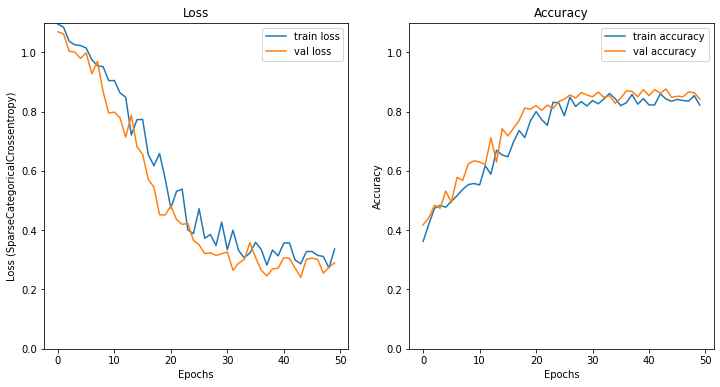

In [ ]:
import matplotlib.pyplot as plt

with open(os.path.join(base_name, "history.json")) as fp:
  history = json.load(fp)

fig, plots = plt.subplots(1, 2)
fig.set_size_inches(12, 6)

loss_plot = plots[0]
acc_plot = plots[1]

loss_plot.set_ylim((0, 1.1))
acc_plot.set_ylim((0, 1.1))

loss_plot.set_title("Loss")
loss_plot.set(xlabel="Epochs", ylabel="Loss (SparseCategoricalCrossentropy)")
loss_plot.plot(history["loss"], label="train loss")
loss_plot.plot(history["val_loss"], label="val loss")
loss_plot.legend()

acc_plot.set_title("Accuracy")
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")
acc_plot.plot(history["accuracy"], label="train accuracy")
acc_plot.plot(history["val_accuracy"], label="val accuracy")
acc_plot.legend()

---

# (Attempts to) Convert Model to Tflite:

---

In [ ]:
# model.build([None])

# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = converter.convert()
# print(tflite_model)

# with open('distilbert_test.tflite', 'wb') as f:
#   f.write(tflite_model)

In [ ]:
# interpreter = tf.lite.Interpreter("bert_test_2.tflite")
# interpreter.allocate_tensors()

# input_details = interpreter.get_input_details()
# print(input_details)
# output_details = interpreter.get_output_details()
# print(output_details)

# print(interpreter.get_signature_list())

# interpreter.set_tensor(input_details[0]['index'], ["Hello World!"])
# interpreter.invoke()

# output_data = interpreter.get_tensor(output_details[0]['index'])
# print(output_data)

---

# Deployment Sample:

---


In [ ]:
!pip install trafilatura
!pip install transformers
!pip install -U tensorflow-text
!pip install requests  # extra dependency but it makes life easy 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 7.9 MB/s 
     |████████████████████████████████| 837 kB 52.4 MB/s 
     |████████████████████████████████| 139 kB 65.2 MB/s 
     |████████████████████████████████| 412 kB 55.4 MB/s 
     |████████████████████████████████| 288 kB 74.7 MB/s 
     |████████████████████████████████| 749 kB 60.3 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2022.6.2
    Uninstalling regex-2022.6.2:
      Successfully uninstalled regex-2022.6.2
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 127 kB 9.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.11
    Uninstalling urllib3-1.26.11:
      Successfully uninstalled urllib3-1.26.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
trafilatura 1.3.0 requires urllib3<2,>=1.26, but you have urllib3 1.25.11 which is incompatible.
htmldate 1.3.0 requires urllib3<2,>=1.26, but you have urllib3 1.25.11 which is incompatible.
courlan 0.8.3 requires urllib3<2,>=1.26, but you have urllib3 1.25.11 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
import zipfile
import os
import trafilatura
import http
import requests

In [ ]:
# !wget "https://docs.google.com/uc?export=download&id=1E_ZC-Zmke2HrxeZu24yMTgqn-gQ3cI2K&confirm=t&uuid=68b827df-d38d-4f34-a034-385b88b67a08" -O "distilbert_v1.zip"

In [ ]:
# Replaces above with python:
model_name = "distilbert_v2"

if not os.path.exists(model_name):
  zipped_model = requests.get("https://docs.google.com/uc?export=download&id=1E_ZC-Zmke2HrxeZu24yMTgqn-gQ3cI2K&confirm=t&uuid=68b827df-d38d-4f34-a034-385b88b67a08")
  
  with open(f"{model_name}.zip", "wb") as zfp:
      zfp.write(zipped_model.content)

  with zipfile.ZipFile(f"distilbert_v1.zip") as zf:
      os.mkdir("distilbert_v1")
      zf.extractall("distilbert_v1")

In [ ]:
from transformers import TFBertTokenizer, TFBertForSequenceClassification, TFDistilBertForSequenceClassification
hf_bert_model_path = "distilbert-base-uncased"  # https://huggingface.co/bert-base-uncased  Note that there are other BERT models available.


tokenizer = TFBertTokenizer.from_pretrained(hf_bert_model_path)  # no TFDistilBertTokenizer, so just use regular bert
classifier = TFDistilBertForSequenceClassification.from_pretrained(hf_bert_model_path, num_labels=3)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.
Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_transform', 'vocab_projector', 'activation_13', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassific

In [ ]:
# Model code from above - update if changed 
class BertTokenizerClassifierCombined(tf.keras.Model):
  def __init__(self, tokenizer, classifier, output_layer_override=None, *args, **kwargs):
    super().__init__(*args, **kwargs)
    self.tokenizer = tokenizer
    self.classifier = classifier
    if output_layer_override is not None:
      self.classifier.classifier = output_layer_override  # replace output with custom
  
  
  def call(self, data):
    tokenized = self.tokenizer(data)
    del tokenized["token_type_ids"]  # for DistilBERT
    print(tokenized)
    out = self.classifier(**tokenized)
    print(out)
    return out

In [ ]:
loaded_model = BertTokenizerClassifierCombined(tokenizer, classifier)
loaded_model.load_weights(f"{model_name}/weights/{model_name}")
loaded_model(["Hello World!"])
loaded_model.summary()

{'input_ids': <tf.Tensor: shape=(1, 5), dtype=int64, numpy=array([[ 101, 7592, 2088,  999,  102]])>, 'attention_mask': <tf.Tensor: shape=(1, 5), dtype=int64, numpy=array([[1, 1, 1, 1, 1]])>}
TFSequenceClassifierOutput(loss=None, logits=<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.1755307 , -0.25688237,  0.18532324]], dtype=float32)>, hidden_states=None, attentions=None)
Model: "bert_tokenizer_classifier_combined_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tf_bert_tokenizer_2 (TFBert  multiple                 0         
 Tokenizer)                                                      
                                                                 
 tf_distil_bert_for_sequence  multiple                 66955779  
 _classification_2 (TFDistil                                     
 BertForSequenceClassificati                                     
 on)                                    

In [ ]:
import requests

def run_model(url):
  text = trafilatura.extract(requests.get(url).text)
  logits = model.predict([text]).logits
  print(tf.nn.softmax(logits[0]))  # [democrat score, republican score, center score]
  

In [ ]:
tf.keras.utils.set_random_seed(3)
run_model("https://www.foxnews.com/politics/trump-arrives-deposition-new-york-attorney-general-letitia-james-civil-investigation#&_intcmp=hp1r_2,hp1r")  # [democrat score, republican score, center score]

1/1 [==============================] - 1s 997ms/step
tf.Tensor([4.5529782e-04 6.1760533e-01 3.8193944e-01], shape=(3,), dtype=float32)
